Group 1

- Avinav Anand:	12410041
- Jerry Mavely:	12410044
- Preksha Rai:	12410063
- Abhhay Verma:	12410081

## Anomaly Detection using Isolation Forest

In [526]:
import pandas as pd
# Original dataset
uci_data = pd.read_csv('heart_disease_uci.csv')

# Drop irrelevant columns (e.g., 'id', 'dataset')
ISF_data = uci_data.drop(columns=['id', 'dataset', 'num', 'thal', 'ca', 'slope'], errors='ignore')

ISF_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4


In [482]:
ISF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 72.0+ KB


In [483]:
# clean, scaled, imputed data with lof score, kmean pca clustering columns
clean_uci_data = pd.read_csv('clean_imputed_clustered_data.csv')
clean_uci_data.head()

,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,age,trestbps,chol,thalch,oldpeak,KMeans_PCA_Cluster
0,1,0,0,1,1,0,0,0,0.714286,0.490741,0.264414,0.633803,0.556818,2
1,1,0,0,0,0,0,0,1,0.795918,0.629630,0.369781,0.338028,0.465909,1
2,1,0,0,0,0,0,0,1,0.795918,0.259259,0.256461,0.485915,0.590909,1
3,1,0,1,0,0,1,0,0,0.183673,0.351852,0.298211,0.894366,0.693182,0
4,0,1,0,0,0,0,0,0,0.265306,0.351852,0.206759,0.788732,0.454545,2


In [484]:
clean_uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex_Male                  920 non-null    int64  
 1   cp_atypical angina        920 non-null    int64  
 2   cp_non-anginal            920 non-null    int64  
 3   cp_typical angina         920 non-null    int64  
 4   fbs_True                  920 non-null    int64  
 5   restecg_normal            920 non-null    int64  
 6   restecg_st-t abnormality  920 non-null    int64  
 7   exang_True                920 non-null    int64  
 8   age                       920 non-null    float64
 9   trestbps                  920 non-null    float64
 10  chol                      920 non-null    float64
 11  thalch                    920 non-null    float64
 12  oldpeak                   920 non-null    float64
 13  KMeans_PCA_Cluster        920 non-null    int64  
dtypes: float64

In [485]:
from sklearn.ensemble import IsolationForest

# Initialize a results list to store outputs for each cluster
results = []

# Step 2: Group by KMeans_PCA_Cluster
for cluster_id, cluster_data in clean_uci_data.groupby('KMeans_PCA_Cluster'):
    print(f"Processing Cluster: {cluster_id}")
    
    # Extract features for the current cluster
    cluster_features = cluster_data[features.columns]
    
   # Training Isolation Forest for the cluster
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_forest.fit(cluster_features)  # Fitting the model

    # Adding anomaly scores and predictions
    cluster_data['anomaly_score'] = iso_forest.decision_function(cluster_features)
    cluster_data['is_anomaly'] = iso_forest.predict(cluster_features)
    cluster_data['is_anomaly'] = cluster_data['is_anomaly'].apply(lambda x: 1 if x == -1 else 0)

    # Append cluster results
    results.append(cluster_data)

# Step 5: Combine results
final_data = pd.concat(results)

# Display a summary
final_data['is_anomaly'].value_counts()

Processing Cluster: 0
Processing Cluster: 1
Processing Cluster: 2
Processing Cluster: 3


is_anomaly
0    827
1     93
Name: count, dtype: int64

In [486]:
# Sort by original index to ensure serial order
final_data = final_data.sort_index()

In [487]:
# Save or display the updated data
final_data.head(5)

,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,age,trestbps,chol,thalch,oldpeak,KMeans_PCA_Cluster,anomaly_score,is_anomaly
0,1,0,0,1,1,0,0,0,0.714286,0.490741,0.264414,0.633803,0.556818,2,0.021821,0
1,1,0,0,0,0,0,0,1,0.795918,0.629630,0.369781,0.338028,0.465909,1,0.124082,0
2,1,0,0,0,0,0,0,1,0.795918,0.259259,0.256461,0.485915,0.590909,1,0.143029,0
3,1,0,1,0,0,1,0,0,0.183673,0.351852,0.298211,0.894366,0.693182,0,0.002333,0
4,0,1,0,0,0,0,0,0,0.265306,0.351852,0.206759,0.788732,0.454545,2,0.024267,0


In [488]:
# Storing dataframe in csv file format
final_data.to_csv('final_ISF_data.csv', index = False)

In [489]:
ISF_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4


In [490]:
# adding 3 columns in ISF_data dataframe from final_data dataframe
new_columns_to_add = final_data[['KMeans_PCA_Cluster', 'anomaly_score',	'is_anomaly']]
# Concatenate the columns to ISF_data on the right side
ISF_data = pd.concat([ISF_data, new_columns_to_add], axis=1)
ISF_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,KMeans_PCA_Cluster,anomaly_score,is_anomaly
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,2,0.021821,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,1,0.124082,0
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,0.143029,0
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,0.002333,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,2,0.024267,0


In [491]:
# Storing dataframe in csv file format - anomaly_score in original dataset
ISF_data.to_csv('ISF_clustered_data.csv', index = False)

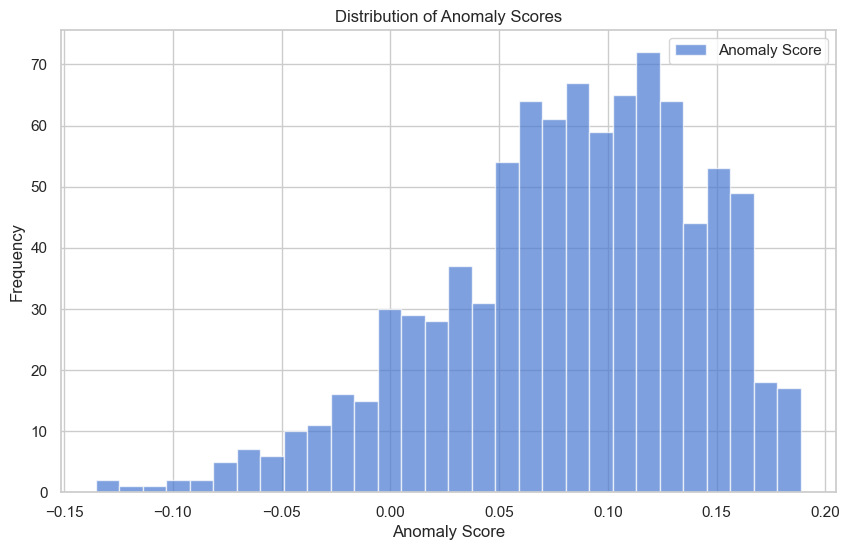

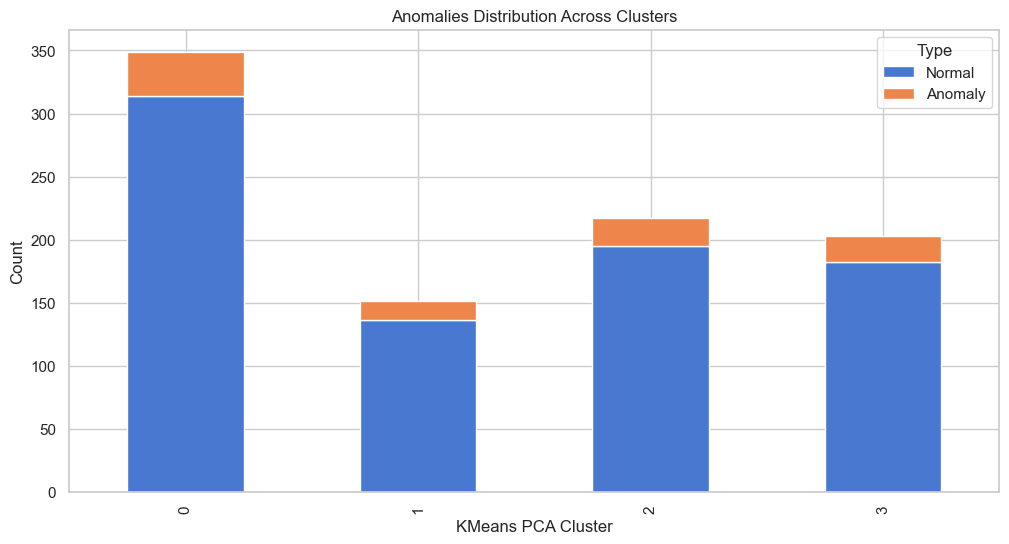

In [492]:
import matplotlib.pyplot as plt
# Analyze the distribution of anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(ISF_data['anomaly_score'], bins=30, alpha=0.7, label='Anomaly Score')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.show()


# Analyze the number of anomalies per cluster
anomaly_cluster_counts = ISF_data.groupby(['KMeans_PCA_Cluster', 'is_anomaly']).size().unstack(fill_value=0)
anomaly_cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('KMeans PCA Cluster')
plt.ylabel('Count')
plt.title('Anomalies Distribution Across Clusters')
plt.legend(['Normal', 'Anomaly'], title="Type")
plt.show()

In [493]:
# Compute correlation between numerical features and anomaly scores
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak','anomaly_score']
correlation_matrix = ISF_data[numerical_features].corr()

# Extract correlations with anomaly_score and lof_scores
anomaly_correlations = correlation_matrix[['anomaly_score']].drop(['anomaly_score'])

# Display correlations for insights
anomaly_correlations_sorted = anomaly_correlations.sort_values(by='anomaly_score', ascending=False)
anomaly_correlations_sorted

,anomaly_score
oldpeak,-0.012730
age,-0.021766
trestbps,-0.129818
thalch,-0.140336
chol,-0.176755


In [494]:
# define the selected features
selected_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

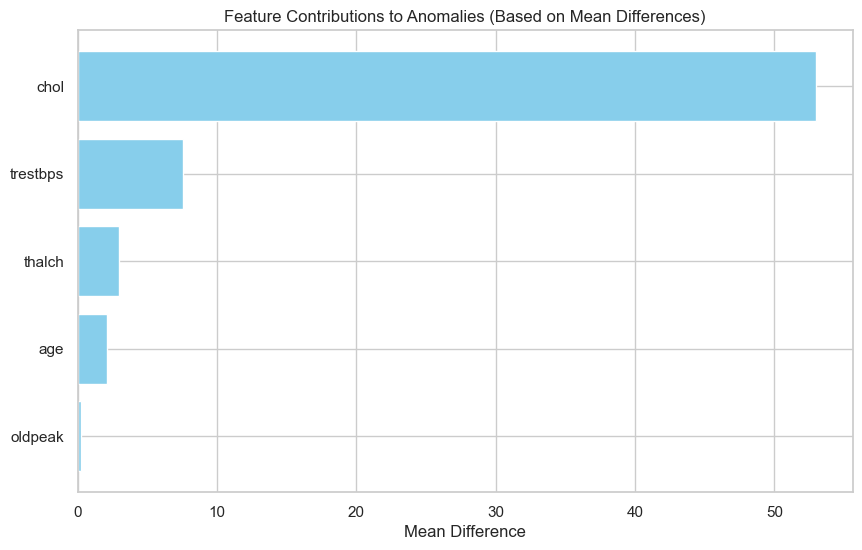

,Feature,Mean Difference
0,chol,52.954435
1,trestbps,7.531768
2,thalch,2.939390
3,age,2.111141
4,oldpeak,0.268126


In [495]:
import numpy as np

# Separate anomalies and normal points
anomalies = ISF_data[ISF_data['is_anomaly'] == 1]
normal_points = ISF_data[ISF_data['is_anomaly'] == 0]

# Calculate the mean difference for each feature
feature_differences = {
    feature: abs(anomalies[feature].mean() - normal_points[feature].mean())
    for feature in selected_features
}

# Create a DataFrame for the differences
feature_difference_df = pd.DataFrame({
    'Feature': list(feature_differences.keys()),
    'Mean Difference': list(feature_differences.values())
}).sort_values(by='Mean Difference', ascending=False)


# Plot the feature differences
plt.figure(figsize=(10, 6))
plt.barh(feature_difference_df['Feature'], feature_difference_df['Mean Difference'], color='skyblue')
plt.xlabel('Mean Difference')
plt.title('Feature Contributions to Anomalies (Based on Mean Differences)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Display the sorted differences
feature_difference_df.reset_index(drop=True)

The above bar plot displays mean differences between anomalies and normal points for each feature.
- Cholestrol has largest mean_difference which suggests that it may significantly contribute to anomalies.
- Resting Blood Pressure(trestbps) is the second highest mean difference
- thalch & age are having moderate mean differences
- oldpeak & ca are relatively small difference

<Figure size 600x600 with 0 Axes>

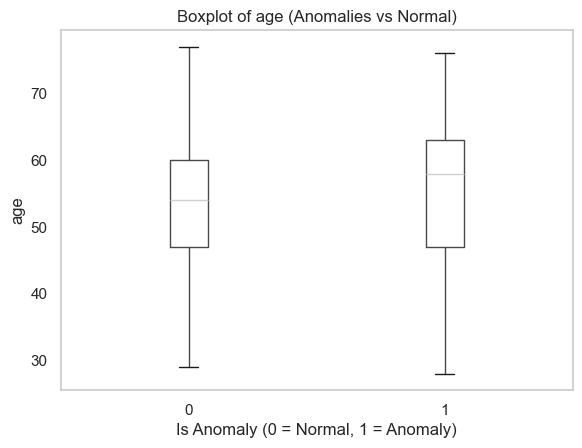

<Figure size 600x600 with 0 Axes>

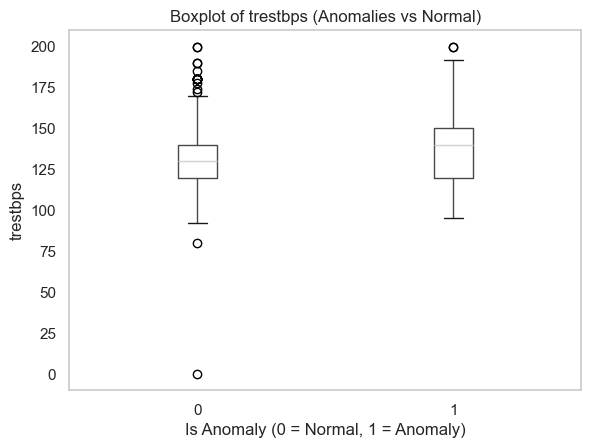

<Figure size 600x600 with 0 Axes>

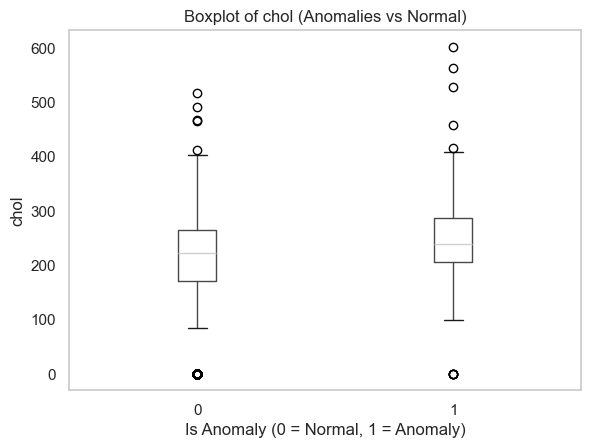

<Figure size 600x600 with 0 Axes>

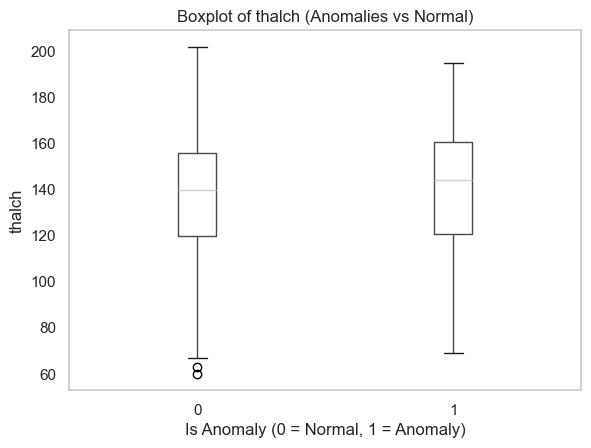

<Figure size 600x600 with 0 Axes>

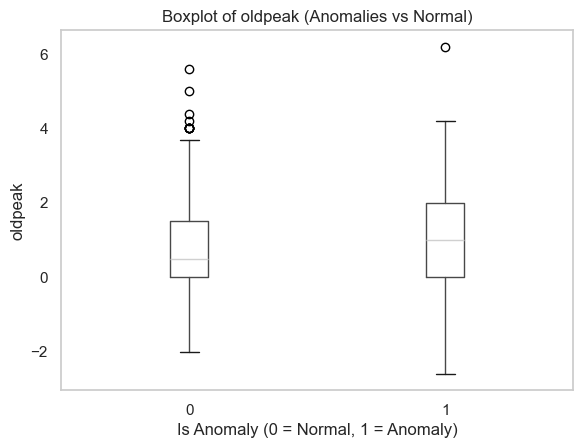

In [497]:

# Boxplot comparison for each feature
for feature in selected_features:
    plt.figure(figsize=(6, 6))
    ISF_data.boxplot(column=feature, by='is_anomaly', grid=False)
    plt.title(f'Boxplot of {feature} (Anomalies vs Normal)')
    plt.suptitle('')  # Remove default title
    plt.xlabel('Is Anomaly (0 = Normal, 1 = Anomaly)')
    plt.ylabel(feature)
    plt.show()


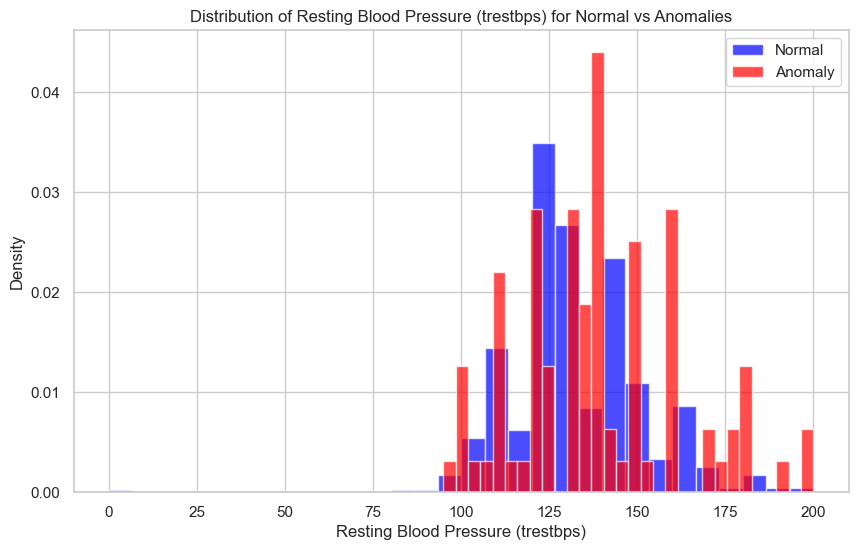

In [498]:
# Histogram comparison: Distribution of 'trestbps' for anomalies vs normal points
plt.figure(figsize=(10, 6))
plt.hist(normal_points['trestbps'], bins=30, alpha=0.7, label='Normal', color='blue', density=True)
plt.hist(anomalies['trestbps'], bins=30, alpha=0.7, label='Anomaly', color='red', density=True)
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Density')
plt.title('Distribution of Resting Blood Pressure (trestbps) for Normal vs Anomalies')
plt.legend()
plt.show()

In [499]:
from scipy.stats import ttest_ind, ks_2samp
# Analyze anomalies within specific KMeans_PCA_Cluster groups
cluster_anomalies = ISF_data.groupby(['KMeans_PCA_Cluster', 'is_anomaly']).size().unstack(fill_value=0)


# Statistical Testing: Compare anomalies and normal points
# Perform t-tests and KS-tests for numerical features
stat_results = []
for feature in selected_features:
    t_stat, t_pval = ttest_ind(anomalies[feature].dropna(), normal_points[feature].dropna(), equal_var=False)
    ks_stat, ks_pval = ks_2samp(anomalies[feature].dropna(), normal_points[feature].dropna())
    stat_results.append({
        'Feature': feature,
        'T-Test p-value': t_pval,
        'KS-Test p-value': ks_pval
    })

# Convert results to a DataFrame
stat_results_df = pd.DataFrame(stat_results)

# Ensure only numeric columns are used for the anomaly profiling step
numeric_columns = anomalies.select_dtypes(include=['number']).columns

# Anomaly Profiling: Identify subgroups within anomalies
anomaly_clusters = anomalies.groupby('KMeans_PCA_Cluster')[numeric_columns].mean()


In [500]:
# Display statistical test results and anomaly cluster profiling
stat_results_df

,Feature,T-Test p-value,KS-Test p-value
0,age,0.096328,0.020182
1,trestbps,0.003942,0.001938
2,chol,0.000015,0.016103
3,thalch,0.354208,0.447125
4,oldpeak,0.071402,0.242559


Features with low p-values (<0.05) such as trestbps, chol are significantly different between anomalies and normal points, indicating their strong contribution to anomalies.

In [502]:
# Display average feature values for anomalies within 
anomaly_clusters

,age,trestbps,chol,thalch,oldpeak,KMeans_PCA_Cluster,anomaly_score,is_anomaly
KMeans_PCA_Cluster,,,,,,,,
0,55.800000,137.617647,248.942857,138.470588,1.044118,0.0,-0.039831,1.0
1,56.800000,138.200000,264.866667,132.466667,1.514286,1.0,-0.033709,1.0
2,56.000000,139.095238,239.650000,147.857143,1.040000,2.0,-0.030364,1.0
3,53.142857,141.142857,236.571429,140.761905,1.052381,3.0,-0.037289,1.0


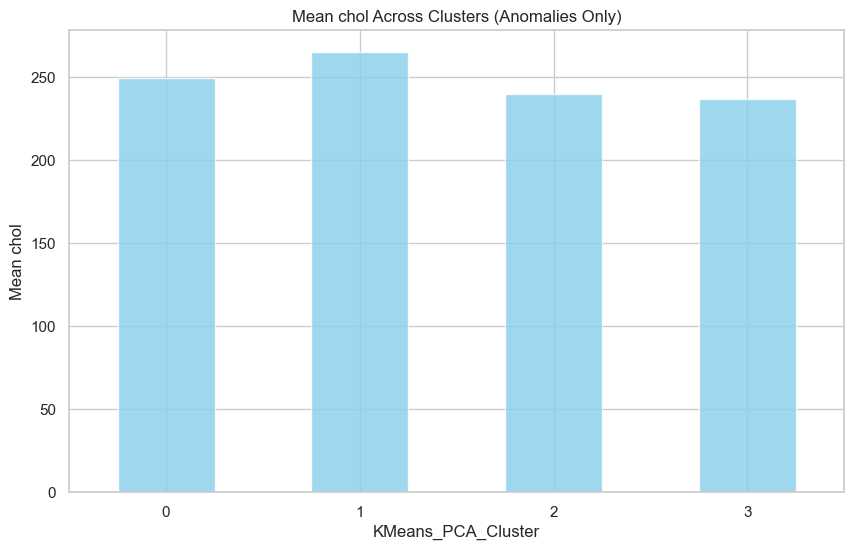

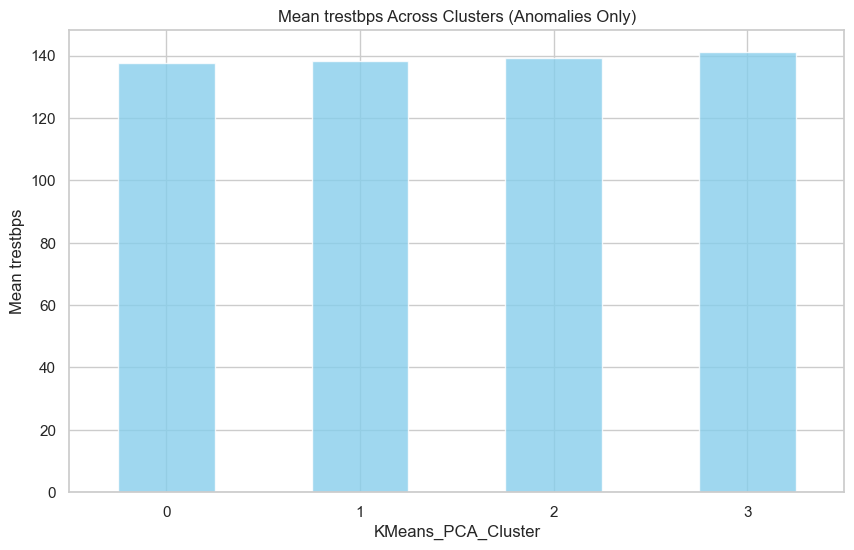

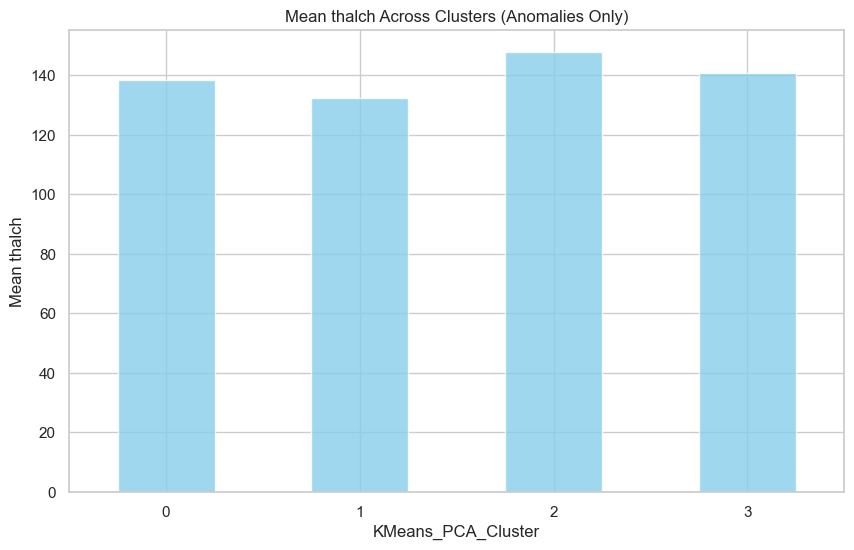

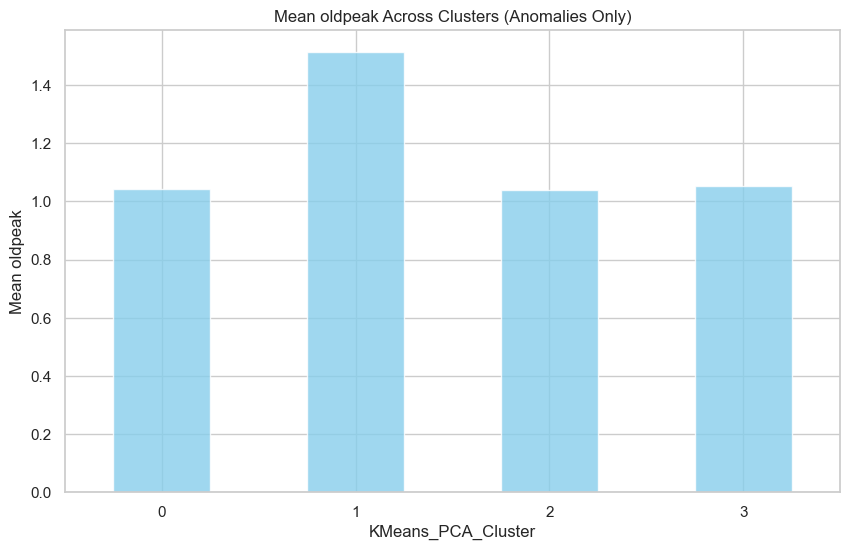

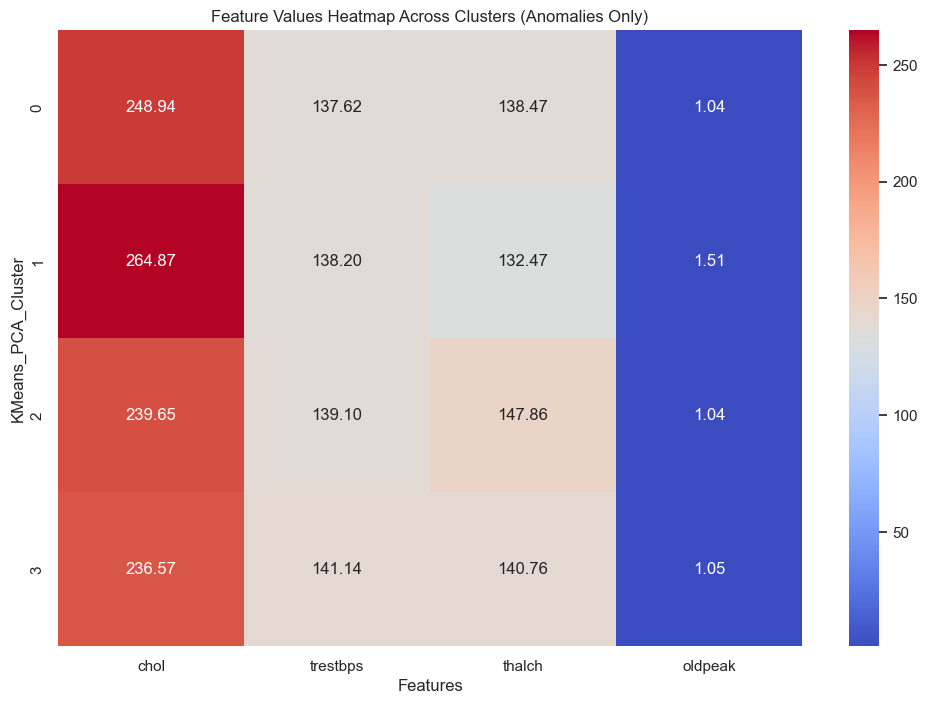

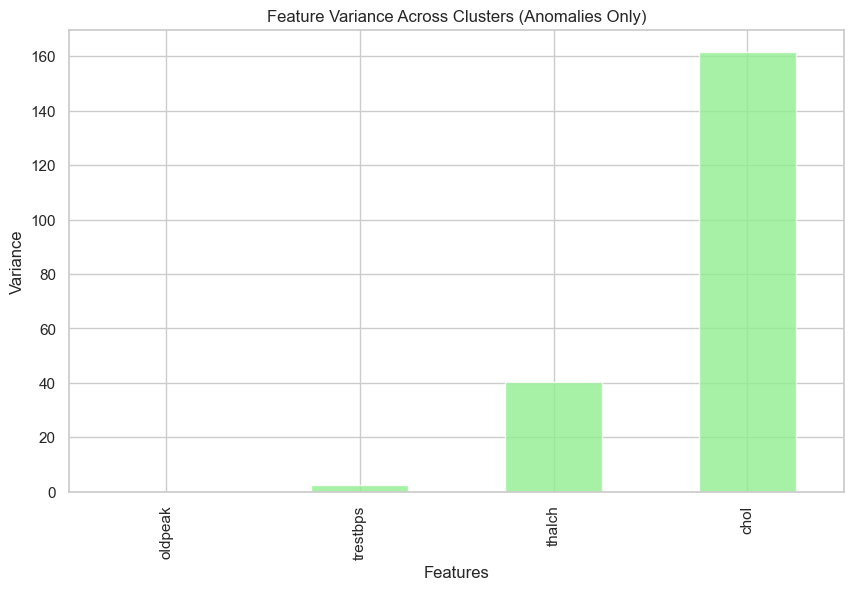

In [503]:
# Cluster Comparisons: Visualize feature differences across clusters using bar charts

# Selected features for visualization
features_to_visualize = ['chol', 'trestbps', 'thalch', 'oldpeak']

# Plot mean values of each feature across clusters
for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    anomaly_clusters[feature].plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'Mean {feature} Across Clusters (Anomalies Only)')
    plt.xlabel('KMeans_PCA_Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.xticks(rotation=0)
    plt.show()

# Heatmap: Visualize the relative values of features across clusters
plt.figure(figsize=(12, 8))
sns.heatmap(anomaly_clusters[features_to_visualize], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Values Heatmap Across Clusters (Anomalies Only)')
plt.xlabel('Features')
plt.ylabel('KMeans_PCA_Cluster')
plt.show()

# Feature Importance Per Cluster: Calculate variance of each feature within clusters
feature_variance_per_cluster = anomaly_clusters[features_to_visualize].var()

# Bar chart for feature variances
plt.figure(figsize=(10, 6))
feature_variance_per_cluster.sort_values().plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Feature Variance Across Clusters (Anomalies Only)')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

Cholestrol(chol):
- Cluster 1: It has highest mean cholestrol level among anomalies. This means that in cluster 1, anomalies are created due to - hig cholestrol levels in patients.
- Cluster 3: It has lowest mean cholestrol level among anomalies.

Resting Blood Pressure(trestbps):
- Cluster 3 has highest values of trestbps. This means that Cluster 3 anomalies are characterized by high blood pressue.
thalch
- The anomalies in Cluster 0 & 2 are related to physical exertion and stress because these 2 cluster exhibit higher heart rate values compared to other clusters.

ST Depression (oldpeak)
- oldpeak doesn't contribute in anomalies as it is relatively consistent among all clusters.

__Cluster-wise summary__
Cluster 0: Characterized by moderate cholesterol and resting blood pressure but higher heart rates.

Cluster 1: High cholesterol levels but lower heart rates and moderate blood pressure.

Cluster 2: Low cholesterol but higher heart rates and resting blood pressure.

Cluster 3: Elevated resting blood pressure and lower cholesterol, with stable heart rates.

__Conclusion__
The anomalies are driven by different feature combinations in each cluster, suggesting distinct underlying causes or patterns. For instance:

    Cluster 1 anomalies might be associated with metabolic issues (e.g., high cholesterol).
    Cluster 3 anomalies might stem from cardiovascular stress (elevated blood pressure).

The bar plots above demonstrates that certain features (like chol and trestbps) are more prominent contributors to anomalies, while others (like oldpeak) are consistent across clusters.